## Observations and Insights 

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merge_df
# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
merge_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [62]:
# Checking the number of mice.
mouse_df=merge_df["Mouse ID"]
len(mouse_df.unique())

249

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [64]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanmouse_df=clean_df.drop_duplicates(subset=['Mouse ID'], keep='last')
cleanmouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [65]:
# Checking the number of mice in the clean DataFrame.
len(cleanmouse_df)

249

## Summary Statistics

In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_df = cleanmouse_df.groupby(['Drug Regimen'])

In [92]:
regavg_df=regimen_df.mean()
regavg_df

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,14.040,20.120,41.000000,36.667568,1.280000
Ceftamin,12.800,27.400,30.600000,57.753977,1.720000
Infubinol,16.400,27.320,30.600000,58.178246,1.600000
Ketapril,14.720,28.080,32.600000,62.806191,1.920000
Naftisol,12.240,27.240,32.200000,61.205757,2.000000
Placebo,10.680,28.040,31.200000,60.508414,2.080000
Propriva,9.880,27.240,26.200000,56.736964,1.560000
Ramicane,10.840,20.000,40.600000,36.191390,1.200000
Stelasyn,13.125,27.875,32.708333,61.001707,1.458333


In [94]:
regcount_df=regimen_df.count()
regcount_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,25,25,25,25,25,25,25
Ceftamin,25,25,25,25,25,25,25
Infubinol,25,25,25,25,25,25,25
Ketapril,25,25,25,25,25,25,25
Naftisol,25,25,25,25,25,25,25
Placebo,25,25,25,25,25,25,25
Propriva,25,25,25,25,25,25,25
Ramicane,25,25,25,25,25,25,25
Stelasyn,24,24,24,24,24,24,24


In [78]:
regimen_sum_df=regimen_df.mean
regimen_summary_df=regimen_sum_df["Drug Regimen","Tumor Volume (mm3)"]

TypeError: 'method' object is not subscriptable

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [125]:
regcount_df.columns

Index(['Mouse ID', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint',
       'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [147]:
users = regcount_df["Mouse ID"]
users

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [148]:
#drugs=cleanmouse_df["Drug Regimen"].unique.sort_values.unique()
#drugs

AttributeError: 'function' object has no attribute 'sort_values'

In [159]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
users = regcount_df["Mouse ID"]
x_axis = np.arange(len(users))

Text(0, 0.5, '# of Mice')

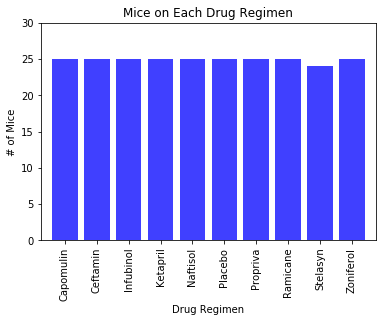

In [166]:
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
plt.bar(x_axis, users, color='b', alpha=0.75, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
                            "Propriva","Ramicane","Stelasyn","Zoniferol"],rotation='vertical')
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
# Sets the y limits of the current chart
plt.ylim(0, max(users)+5)
# Give our chart some labels and a tile
plt.title("Mice on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

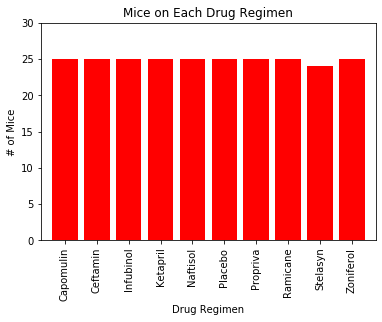

In [173]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Create a bar chart based upon the above data
plt.bar(x_axis, users, color="r", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", 
                            "Propriva","Ramicane","Stelasyn","Zoniferol"],rotation='vertical')

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(users)+5)

# Give the chart a title, x label, and y label
plt.title("Mice on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")

plt.show()

In [181]:
sex_df = cleanmouse_df.groupby(['Sex'])
sex=sex_df.count()
sex

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,124,124,124,124,124,124,124
Male,125,125,125,125,125,125,125


Text(0.5, 1.0, 'Male/Female Distribution')

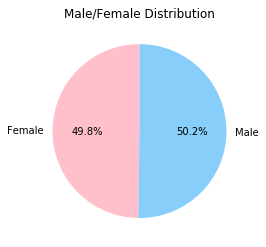

In [185]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
labels = ["Female", "Male"]

# The values of each section of the pie chart
values = sex["Mouse ID"]

# The colors of each section of the pie chart
colors = ["pink", "lightskyblue"]

plt.pie(values, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=90)
plt.title("Male/Female Distribution")

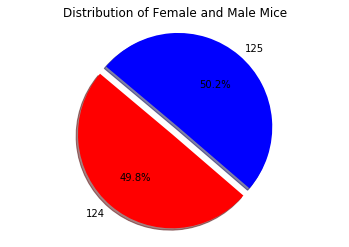

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_labels = ["Female","Male"]
py_values = sex["Mouse ID"]
py_colors = ["red","blue"]
explode = (0.1,0)

plt.pie(py_values, explode=explode, labels=py_values, colors=py_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

plt.title("Distribution of Female and Male Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [190]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin", :]
capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [194]:
timepoint_df = capomulin_df.groupby(['Timepoint'])
tumor_df=timepoint_df.mean()
tumor_df

,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Timepoint,,,,
0,14.040000,20.120000,45.000000,0.000000
5,14.040000,20.120000,44.266086,0.160000
10,14.040000,20.120000,43.084291,0.320000
15,13.666667,20.000000,42.064317,0.375000
20,13.304348,19.782609,40.716325,0.652174
25,13.181818,19.909091,39.939528,0.818182
30,13.181818,19.909091,38.769339,1.090909
35,13.181818,19.909091,37.816839,1.181818
40,12.809524,19.857143,36.958001,1.380952


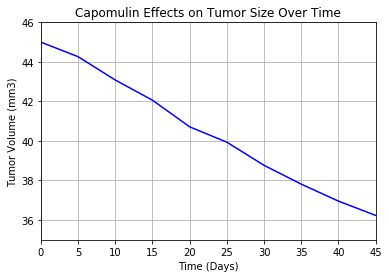

In [201]:
# Create the X and Y axis lists
time = [0,5,10,15,20,25,30,35,40,45]
line_values=tumor_df["Tumor Volume (mm3)"]

# Plot the chart and apply some styling
tumor, = plt.plot(time, line_values, color="blue", label="Tumor Volume (mm3)")

# Add labels to X and Y axes :: Add title
plt.title("Capomulin Effects on Tumor Size Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Set the limits for the X and Y axes
plt.xlim(0,45)
plt.ylim(35,46)

# Add in a grid for the chart
plt.grid()

Text(0, 0.5, 'Tumor Volume (mm3)')

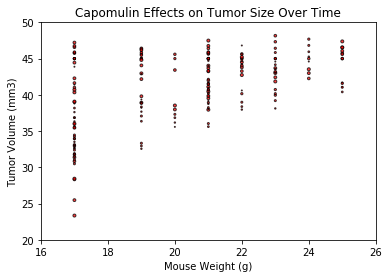

In [221]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight=capomulin_df["Weight (g)"]
tumor_vol=capomulin_df["Tumor Volume (mm3)"]
plt.scatter(weight, tumor_vol, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(20, 50)
# The x limits of our scatter plot is 0 to 100
plt.xlim(16, 26)

plt.title("Capomulin- Weight v. Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
